In [15]:
import random
import numpy as np
import pandas as pd

In [16]:
random.randint(0, 1)

1

In [20]:
df = pd.DataFrame(np.random.randint(0,2,size=(100, 5)))

In [31]:
df[5] = round((df[0] + df[1] + df[2] + df[3] + df[4]) / 5)

In [29]:
df

,0,1,2,3,4,5
0,0,1,1,1,0,1.0
1,0,0,1,0,0,0.0
2,0,0,1,0,0,0.0
3,0,1,1,0,0,0.0
4,0,0,1,0,0,0.0
...,...,...,...,...,...,...
95,1,1,0,0,1,1.0
96,1,0,0,0,0,0.0
97,0,1,1,0,0,0.0
98,1,1,1,1,0,1.0


In [262]:
common_pipeline = Pipeline(
    steps=[
        ('imp', imputer),
        ('ohe', ohe_transform),
        ('classifier', LogisticRegression(max_iter=1000))
    ])

In [190]:
imbalanced_nans = ['employment_industry', 'employment_occupation']
imbalanced_nan_num = ['health_insurance']
ord_num_columns = ['h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']
ord_obj_columns = ['age_group', 'education', 'income_poverty']
cat_only_columns = ['race', 'sex', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation', 'health_insurance']

all_columns = list(X.columns.values)

In [191]:
first_imputer = PandasSimpleImputer(strategy='constant', fill_value='unknown')
second_imputer = PandasSimpleImputer(strategy='constant', fill_value=2)
third_imputer = PandasSimpleImputer(strategy='most_frequent')

In [192]:
impute_transform_1 = PandasTransformer(transformers=[('unk', first_imputer, imbalanced_nans)])
impute_transform_2 = PandasTransformer(transformers=[('unk2', second_imputer, imbalanced_nan_num)])
impute_transform_3 = ColumnTransformer(transformers=[('imp', third_imputer, all_columns)])

In [162]:
common_pipeline = Pipeline(
    steps=[
        ('imp_unk', impute_transform_1),
        ('imp_unk_2', impute_transform_2),
        ('imp_3', impute_transform_3)
    ])

In [166]:
X_train

In [165]:
common_pipeline.fit_transform(X_train)

In [107]:
linear_preprocessor = ColumnTransformer(
    transformers=[
        ('imputer', common_imputer, )
    ])

In [69]:
X_train.isna().sum().count()

35

In [72]:
X_train_imp = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns, index=X_train.index)

In [73]:
X_train_imp

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18081,2,2,0,1,0,1,0,1,1,0,1,0,0,0,1,3,3,2,3,3,1,35 - 44 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,dqpwygqj,"MSA, Principle City",1,0,fcxhlnwr,xtkaffoo
4201,3,2,0,1,0,1,1,1,1,1,1,1,0,0,1,4,2,4,5,4,5,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Not Principle City",0,0,fcxhlnwr,xtkaffoo
1237,2,1,0,1,0,1,0,0,1,0,1,1,0,0,1,2,4,1,2,4,2,35 - 44 Years,College Graduate,White,Female,"> $75,000",Married,Own,Employed,fpwskwrf,"MSA, Not Principle City",1,0,wxleyezf,emcorrxb
15265,1,1,0,1,0,1,0,0,1,0,0,0,0,0,1,5,2,2,5,2,2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,fpwskwrf,"MSA, Not Principle City",0,0,fcxhlnwr,xtkaffoo
19302,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,3,4,4,4,4,2,18 - 34 Years,12 Years,White,Female,Below Poverty,Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",1,3,cfqqtusy,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8746,2,2,0,0,0,1,0,0,0,1,1,0,0,0,1,4,2,1,5,2,1,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,fpwskwrf,"MSA, Not Principle City",2,0,fcxhlnwr,mxkfnird
6158,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,5,1,1,1,1,1,35 - 44 Years,< 12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lzgpxyit,Non-MSA,0,0,fcxhlnwr,xtkaffoo
6260,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,3,2,1,4,2,1,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,mlyzmhmf,"MSA, Principle City",1,0,wxleyezf,emcorrxb


In [485]:
common_pipe = Pipeline([('imputer', SimpleImputer(strategy='most_frequent', add_indicator=True))])

### The Linear pipe

In [486]:
all_columns = list(X.columns.values)

In [490]:
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

In [491]:
linear_preprocessor = ColumnTransformer([('common_pipe', common_pipe, all_columns),
                                         ('ohe', categorical_transformer, all_columns)])

In [493]:
#pd.DataFrame(imputer.transform(X_train), columns=X_train.columns, index=X_train.index)

linear_preprocessor.fit_transform(X_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### The Tree pipe

In [469]:
def ord_encode(df):
    
    """
    This function takes a dataframe and encodes some of the
    categorical variables as ordinal, according to a pre-defined
    list of values. This operation is in place.
    """

    df = pd.DataFrame(df)
    
    age_group_values = ['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years']
    education_values = ['< 12 Years', '12 Years', 'Some College', 'College Graduate']
    income_poverty_values = ['Below Poverty', '<= $75,000, Above Poverty', '> $75,000']

    values_dict = {'age_group': age_group_values, 'education': education_values, 'income_poverty': income_poverty_values}

    for column_name, values_list in values_dict.items():    
        for num, value in enumerate(values_list):
            df.loc[df[column_name] == value, column_name] = int(num)
        df[column_name] = df[column_name].astype(int)

In [470]:
tree_pipe = Pipeline([('common_pipe', common_pipe),
                      ('ord_encoder', FunctionTransformer(ord_encode))])

In [471]:
tree_pipe.fit_transform(X_train)

KeyError: 'age_group'

In [387]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

#imputer.fit(X_train)

#X_train = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns, index=X_train.index)

In [280]:
class PandasSimpleImputer(SimpleImputer):
    """
    A wrapper around 'SimpleImputer' to return data frames with columns.
    """

    def fit(self, X, y=None):
        self.columns = X.columns
        return super().fit(X, y)

    def transform(self, X):
        return pd.DataFrame(super().transform(X), columns=self.columns)


In [266]:
ord_encoder = FunctionTransformer(ord_obj_as_num)
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imputer.fit_transform(X_train)

array([[2.0, 2.0, 0.0, ..., 0.0, 'unknown', 'unknown'],
       [3.0, 2.0, 0.0, ..., 0.0, 'unknown', 'unknown'],
       [2.0, 1.0, 0.0, ..., 0.0, 'wxleyezf', 'emcorrxb'],
       ...,
       [1.0, 1.0, 0.0, ..., 0.0, 'wxleyezf', 'emcorrxb'],
       [3.0, 2.0, 0.0, ..., 0.0, 'pxcmvdjn', 'xgwztkwe'],
       [3.0, 1.0, 0.0, ..., 0.0, 'unknown', 'unknown']], dtype=object)

In [267]:
X_train.isna().sum()

h1n1_concern                     70
h1n1_knowledge                   90
behavioral_antiviral_meds        56
behavioral_avoidance            169
behavioral_face_mask             17
behavioral_wash_hands            35
behavioral_large_gatherings      74
behavioral_outside_home          68
behavioral_touch_face           108
doctor_recc_h1n1               1751
doctor_recc_seasonal           1751
chronic_med_condition           782
child_under_6_months            656
health_worker                   643
health_insurance               9790
opinion_h1n1_vacc_effective     323
opinion_h1n1_risk               321
opinion_h1n1_sick_from_vacc     323
opinion_seas_vacc_effective     381
opinion_seas_risk               416
opinion_seas_sick_from_vacc     440
age_group                         0
education                      1133
race                              0
sex                               0
income_poverty                 3556
marital_status                 1143
rent_or_own                 

In [269]:
ord_encoder.fit_transform(X_train)

ValueError: invalid literal for int() with base 10: '35 - 44 Years'

# Diagnosing the linked fitted model problem

The issue seems to be that only one instantiation of each model class exists for both the H1N1 and seasonal flu tests when run via the functions we've created. This is likely because when passing in the estimator to the train_new_model function, that estimator *is* the instantaion itself, and therefore only one is created each time that function is run. We would need to find a way to instantiate the estimator twice, but this would some amount of testing and debugging and will, unfortunately, be something that we put off until a later date.

In [357]:
estimator = models_dict['Simple Logistic - H1N1']['estimator']
preprocessor = models_dict['Simple Logistic - H1N1']['preprocessor']

In [358]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y['h1n1_vaccine'], random_state=random_state)

In [359]:
y_train_h1n1 = y_train.iloc[:,0]
y_train_ssnl = y_train.iloc[:,1]

y_test_h1n1 = y_test.iloc[:,0]
y_test_ssnl = y_test.iloc[:,1]

In [360]:
# Without this cell, a number of future cells will produce a SettingWithCopyWarning
X_train = X_train.copy()
X_test = X_test.copy()
y_train_h1n1 = y_train_h1n1.copy()
y_train_ssnl = y_train_ssnl.copy()
y_test_h1n1 = y_test_h1n1.copy()
y_test_ssnl = y_test_ssnl.copy()

In [361]:
numeric_columns = list(X_train.columns[X_train.dtypes == 'float64'].values)
obj_columns = list(X_train.columns[X_train.dtypes == 'object'].values)
all_columns = list(X_train.columns.values)

In [367]:
ohe_transform = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(handle_unknown="ignore", sparse=False), all_columns)])
        
linear_preprocessor = Pipeline(
    steps=[
        ('ohe', ohe_transform),
        ('est', estimator)
    ])
        
tree_transformer = ColumnTransformer(
    transformers=[
        ('minmax', MinMaxScaler(), numeric_columns),
        ('ohe', OneHotEncoder(handle_unknown="ignore", sparse=False), obj_columns)
    ])
        
tree_preprocessor = Pipeline(
    steps=[
        ('tree', tree_transformer),
        ('est', estimator)
    ])
    
if preprocessor == 'linear':
    pipe = linear_preprocessor
elif preprocessor == 'tree':
    pipe = tree_preprocessor
        
clean(X_train)
clean(X_test)
clean(X_test_comp)
        
fitted_estimator = pipe.fit(X_train, y_train_h1n1)
y_hat_h1n1 = pipe.predict(X_test)
y_proba_h1n1 = pipe.predict_proba(X_test)
y_proba_h1n1_comp = pipe.predict_proba(X_test_comp)
        
        
#clean(X_train)
#clean(X_test)
#clean(X_test_comp)
        
#fitted_estimator = pipe.fit(X_train, y_train_ssnl)
#y_hat_ssnl = pipe.predict(X_test)
#y_proba_ssnl = pipe.predict_proba(X_test)
#y_proba_ssnl_comp = pipe.predict_proba(X_test_comp)



In [368]:
print(f'Recall for H1N1:            {recall_score(y_test_h1n1, y_hat_h1n1)}')
print(f'Precision for H1N1:         {precision_score(y_test_h1n1, y_hat_h1n1)}')
print(f'Accuracy for H1N1:          {accuracy_score(y_test_h1n1, y_hat_h1n1)}')
print(f'F1 score for H1N1:          {f1_score(y_test_h1n1, y_hat_h1n1)}')
print(f'AUROC for H1N1:             {roc_auc_score(y_test_h1n1, y_proba_h1n1[:,1])}')

Recall for H1N1:            0.5004405286343613
Precision for H1N1:         0.7244897959183674
Accuracy for H1N1:          0.8534256832646949
F1 score for H1N1:          0.5919749869723814
AUROC for H1N1:             0.8691042514625823


In [381]:
predict_with_fitted_model('Simple Logistic - H1N1')

In [382]:
print(f'Recall for H1N1:            {recall_score(y_test_h1n1, y_hat)}')
print(f'Recall for seasonal flu:    {recall_score(y_test_ssnl, y_hat_ssnl)}\n')
print(f'Precision for H1N1:         {precision_score(y_test_h1n1, y_hat)}')
print(f'Precision for seasonal flu: {precision_score(y_test_ssnl, y_hat_ssnl)}\n')
print(f'Accuracy for H1N1:          {accuracy_score(y_test_h1n1, y_hat)}')
print(f'Accuracy for seasonal flu:  {accuracy_score(y_test_ssnl, y_hat_ssnl)}\n')
print(f'F1 score for H1N1:          {f1_score(y_test_h1n1, y_hat)}')
print(f'F1 score for seasonal flu:  {f1_score(y_test_ssnl, y_hat_ssnl)}\n')
print(f'AUROC for H1N1:             {roc_auc_score(y_test_h1n1, y_proba[:,1])}')
print(f'AUROC for seasonal flu:     {roc_auc_score(y_test_ssnl, y_proba_ssnl[:,1])}')

Recall for H1N1:            0.5004405286343613
Recall for seasonal flu:    0.7442424242424243

Precision for H1N1:         0.7244897959183674
Precision for seasonal flu: 0.76814011676397

Accuracy for H1N1:          0.8534256832646949
Accuracy for seasonal flu:  0.7774241856982403

F1 score for H1N1:          0.5919749869723814
F1 score for seasonal flu:  0.7560024625487379

AUROC for H1N1:             0.8691042514625823
AUROC for seasonal flu:     0.8564199370756748


# SOMETHING'S WRONG HERE

In [256]:
tuned_rf = models_dict['Tuned Random Forest - H1N1']['fitted_estimator']

In [257]:
y_hat_ssnl = tuned_rf.predict(X_test_clean)
y_proba_ssnl = tuned_rf.predict_proba(X_test_clean)

/home/matt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['health_insurance'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

Recall:    0.8798732943469786
Precision: 0.9011729473421513
Accuracy:  0.8991377354209212
F1 score:  0.8903957588460115
AUROC:     0.9619289140520564


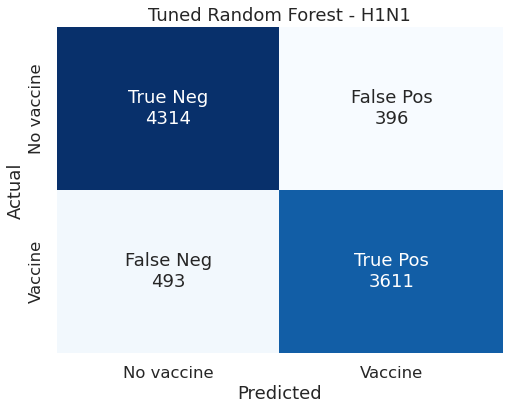

In [223]:
all_metrics(y_test_ssnl, y_hat_ssnl, y_score=y_proba_ssnl, model_name='Tuned Random Forest - H1N1', save_fig=True)

In [275]:
model_stack = [
    models_dict['Simple Logistic - H1N1']['fitted_estimator'],
    models_dict['Tuned HistGradientBoost - H1N1']['fitted_estimator'],
    models_dict['Tuned Random Forest - H1N1']['fitted_estimator']
]




In [218]:
for model in models_dict:
    print(model)    
    print(models_dict[model]['scores']['AUC'])



Simple Logistic - H1N1
0.8564199370756748
Simple Logistic - SSNL
0.8564199370756748
Tuned HistGradientBoost - H1N1
0.8595283846487195
Tuned HistGradientBoost - SSNL
0.8595283846487195
Simple Random Forest - H1N1
0.851203630303735
Tuned Random Forest - SSNL
0.851203630303735


{'Simple Logistic - H1N1': {'estimator': LogisticRegression(max_iter=1000),
  'preprocessor': 'linear',
  'fitted_estimator': Pipeline(steps=[('ohe',
                   ColumnTransformer(transformers=[('ohe',
                                                    OneHotEncoder(handle_unknown='ignore',
                                                                  sparse=False),
                                                    ['h1n1_concern',
                                                     'h1n1_knowledge',
                                                     'behavioral_antiviral_meds',
                                                     'behavioral_avoidance',
                                                     'behavioral_face_mask',
                                                     'behavioral_wash_hands',
                                                     'behavioral_large_gatherings',
                                                     'behavioral_outside_home',
 

In [204]:
model_scoring_dict

{'jambo': {'recall': 0.5004405286343613,
  'precision': 0.7244897959183674,
  'accuracy': 0.8534256832646949,
  'f1': 0.5919749869723814,
  'AUC': 0.8691042514625823},
 'warmbo': {'recall': 0.7442424242424243,
  'precision': 0.76814011676397,
  'accuracy': 0.7774241856982403,
  'f1': 0.7560024625487379,
  'AUC': 0.8564199370756748},
 'H1N1': {'recall': 0.4167400881057269,
  'precision': 0.7691056910569106,
  'accuracy': 0.8494945713216024,
  'f1': 0.5405714285714285,
  'AUC': 0.8631414602681288},
 'Seasonal Flu': {'recall': 0.7377777777777778,
  'precision': 0.7659395973154363,
  'accuracy': 0.7740546611755896,
  'f1': 0.7515949783906153,
  'AUC': 0.850227281535269},
 'Simple Logistic - H1N1': {'recall': 0.5004405286343613,
  'precision': 0.7244897959183674,
  'accuracy': 0.8534256832646949,
  'f1': 0.5919749869723814,
  'AUC': 0.8691042514625823},
 'Simple Logistic - SSNL': {'recall': 0.7442424242424243,
  'precision': 0.76814011676397,
  'accuracy': 0.7774241856982403,
  'f1': 0.7560

In [294]:
log_reg_h1n1 = StackingClassifier(model_stack)
log_reg_ssnl = StackingClassifier(model_stack)

log_reg_h1n1.fit(X_train_clean, y_train_h1n1)
log_reg_ssnl.fit(X_train_clean, y_train_ssnl);

TypeError: argument of type 'ColumnTransformer' is not iterable

### Now we'll score it and plot a confusion matrix

In [61]:
y_hat_h1n1 = log_reg_h1n1.predict(X_test_ohe)
y_hat_ssnl = log_reg_ssnl.predict(X_test_ohe)


y_proba_h1n1 = log_reg_h1n1.predict_proba(X_test_ohe)
y_proba_ssnl = log_reg_ssnl.predict_proba(X_test_ohe)

Recall for H1N1:    0.43083700440528633
Recall for Seasonal Flu:    0.7470707070707071

Precision for H1N1: 0.6735537190082644
Precision for Seasonal Flu: 0.7707378074197583

Accuracy for H1N1:  0.8347061025833021
Accuracy for Seasonal Flu:  0.7798577311868214

F1 score for H1N1:  0.5255239118753358
F1 score for Seasonal Flu:  0.7587197373820271

AUROC for H1N1:     0.8400664300845351
AUROC for Seasonal Flu:     0.8549372342187131


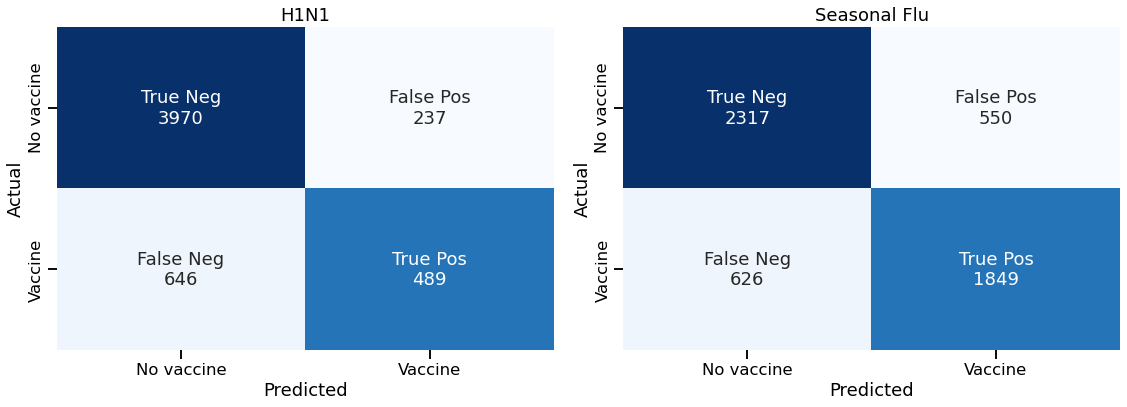

In [62]:
all_metrics([y_test_h1n1, y_test_ssnl], [y_hat_h1n1, y_hat_ssnl], [y_proba_h1n1, y_proba_ssnl], model_name=['H1N1','Seasonal Flu'])

In [276]:
# 1st model stacking attempt

train_new_model(StackingClassifier(model_stack), 'linear')

TypeError: argument of type 'ColumnTransformer' is not iterable

{'estimator': SVC(C=1, gamma=0.001, kernel='linear', probability=True),
 'preprocessor': 'linear',
 'fitted_estimator': Pipeline(steps=[('ohe',
                  ColumnTransformer(transformers=[('ohe',
                                                   OneHotEncoder(handle_unknown='ignore',
                                                                 sparse=False),
                                                   ['h1n1_concern',
                                                    'h1n1_knowledge',
                                                    'behavioral_antiviral_meds',
                                                    'behavioral_avoidance',
                                                    'behavioral_face_mask',
                                                    'behavioral_wash_hands',
                                                    'behavioral_large_gatherings',
                                                    'behavioral_outside_home',
                  

# SOMETHING'S WRONG HERE

In [229]:
tuned_svc = models_dict['Tuned SVC - SSNL']['fitted_estimator']

In [230]:
y_hat_ssnl = tuned_svc.predict(X_test)
y_proba_ssnl = tuned_svc.predict_proba(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Recall:    0.7592592592592593
Precision: 0.7844914400805639
Accuracy:  0.7907873837077377
F1 score:  0.7716691431401684
AUROC:     0.8647390252583571


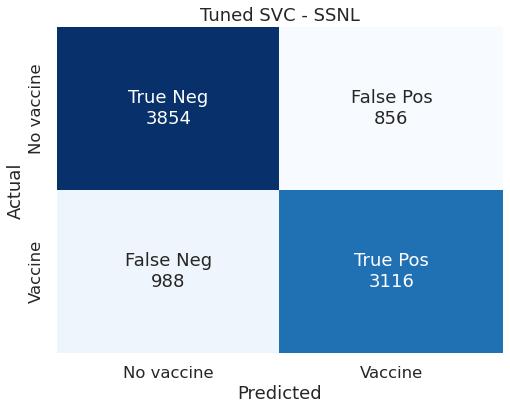

In [216]:
all_metrics(y_test_ssnl, y_hat_ssnl, y_score=y_proba_ssnl, model_name='Tuned SVC - SSNL', save_fig=True)

In [ ]:
all_metrics()

In [220]:
len(X_train)

17893

# Trying out a few models to diagnose any preprocessing issues

### Preprocessing for Tree-based models (though, at the end, I do run a logistic model below, just because I had it ready to go)

In [247]:
ord_num_columns = ['h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']
ord_obj_columns = ['age_group', 'education', 'income_poverty']
cat_only_columns = ['race', 'sex', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation', 'health_insurance']

In [248]:
for column in ord_obj_columns:
    print(X[column].value_counts())

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64
College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: education, dtype: int64
<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_poverty, dtype: int64


In [249]:
def ord_obj_as_num(df):
    
    """
    This function takes a dataframe and encodes some of the
    categorical variables as numerical, according to a pre-defined
    list of values. This operation is in place.
    """

    age_group = ['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years']
    education = ['< 12 Years', '12 Years', 'Some College', 'College Graduate']
    income_poverty = ['Below Poverty', '<= $75,000, Above Poverty', '> $75,000']

    values_dict = {'age_group': age_group, 'education': education, 'income_poverty': income_poverty}

    for column_name, values_list in values_dict.items():    
        for num, value in enumerate(values_list):
            df.loc[df[column_name] == value, column_name] = int(num)
        df[column_name] = df[column_name].astype(int)

In [250]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imputer.fit(X_train)

X_train_imp = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_imp = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

In [251]:
ord_obj_as_num(X_train_imp)
ord_obj_as_num(X_test_imp)

### minmax

In [252]:
X_train_num = X_train_imp.drop(cat_only_columns, axis=1)
X_test_num = X_test_imp.drop(cat_only_columns, axis=1)

In [253]:
minmax = MinMaxScaler()

X_train_scaled = pd.DataFrame(minmax.fit_transform(X_train_num), columns=X_train_num.columns, index=X_train_num.index)
X_test_scaled = pd.DataFrame(minmax.transform(X_test_num), columns=X_test_num.columns, index=X_test_num.index)

In [254]:
X_train_obj = X_train_imp[cat_only_columns]
X_test_obj = X_test_imp[cat_only_columns]

ohe = OneHotEncoder(categories="auto", handle_unknown="ignore", sparse=False)

X_train_ohe = pd.DataFrame(ohe.fit_transform(X_train_obj), columns=ohe.get_feature_names(), index=X_train_obj.index)
X_test_ohe = pd.DataFrame(ohe.transform(X_test_obj), columns=ohe.get_feature_names(), index=X_test_obj.index)

In [255]:
X_train_clean = pd.concat([X_train_scaled, X_train_ohe], axis=1)
X_test_clean = pd.concat([X_test_scaled, X_test_ohe], axis=1)

In [245]:
log_reg_h1n1 = LogisticRegression(max_iter=1000)
log_reg_ssnl = LogisticRegression(max_iter=1000)

log_reg_h1n1.fit(X_train_clean, y_train_h1n1)
log_reg_ssnl.fit(X_train_clean, y_train_ssnl);

### Now we'll score it and plot a confusion matrix

In [246]:
y_hat_h1n1 = log_reg_h1n1.predict(X_test_clean)
y_hat_ssnl = log_reg_ssnl.predict(X_test_clean)

y_proba_h1n1 = log_reg_h1n1.predict_proba(X_test_clean)
y_proba_ssnl = log_reg_ssnl.predict_proba(X_test_clean)

Recall for H1N1:    0.42555066079295156
Recall for Seasonal Flu:    0.7422222222222222

Precision for H1N1: 0.6764705882352942
Precision for Seasonal Flu: 0.7673350041771094

Accuracy for H1N1:  0.8347061025833021
Accuracy for Seasonal Flu:  0.7763010108573568

F1 score for H1N1:  0.5224445646295295
F1 score for Seasonal Flu:  0.7545697268432942

AUROC for H1N1:     0.8379208556328921
AUROC for Seasonal Flu:     0.8502034647134054


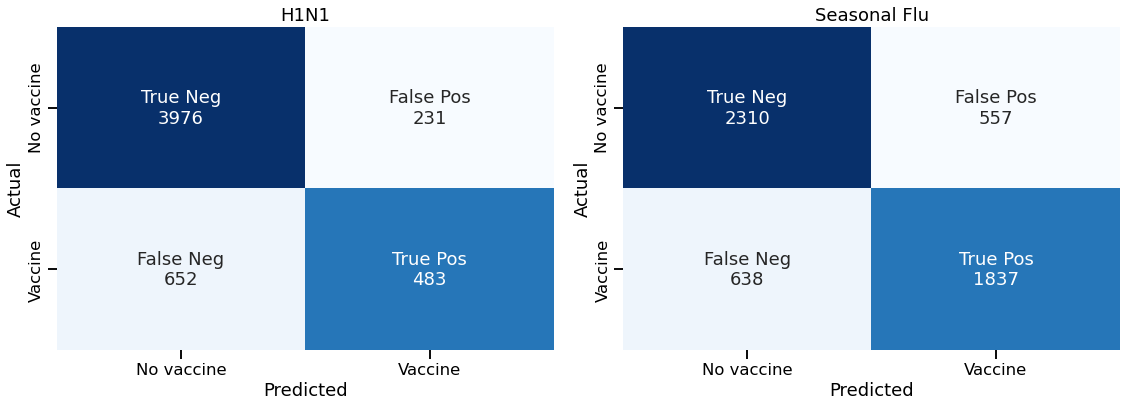

In [248]:
all_metrics([y_test_h1n1, y_test_ssnl], [y_hat_h1n1, y_hat_ssnl], [y_proba_h1n1, y_proba_ssnl], model_name=['H1N1','Seasonal Flu'])

# Logistic Regression, no tuning, dataset is fully OHE

### Simple Imputer

In [58]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imputer.fit(X_train)

X_train_imp = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_imp = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

### One Hot Encoder

In [59]:
X_train_obj = X_train_imp
X_test_obj = X_test_imp

ohe = OneHotEncoder(categories="auto", handle_unknown="ignore", sparse=False)

X_train_ohe = pd.DataFrame(ohe.fit_transform(X_train_obj), columns=ohe.get_feature_names(), index=X_train_obj.index)
X_test_ohe = pd.DataFrame(ohe.transform(X_test_obj), columns=ohe.get_feature_names(), index=X_test_obj.index)

X_train_ohe = pd.concat([X_train_imp[numeric_columns], X_train_ohe], axis=1)
X_test_ohe = pd.concat([X_test_imp[numeric_columns], X_test_ohe], axis=1)

### Standard Scaler

## Fitting the model

There is a class called MultiOutputClassifier that we could use here that would run regressions for both class labels at the same time, but, even though it's convenient for training, it can be slightly less convenient for scoring and analyzing, so for every model we fit for the H1N1 vaccine, we'll fit a second model for the seasonal flu vaccine as well.

In [60]:
log_reg_h1n1 = LogisticRegression(max_iter=1000)
log_reg_ssnl = LogisticRegression(max_iter=1000)

log_reg_h1n1.fit(X_train_ohe, y_train_h1n1)
log_reg_ssnl.fit(X_train_ohe, y_train_ssnl);

### Now we'll score it and plot a confusion matrix

In [61]:
y_hat_h1n1 = log_reg_h1n1.predict(X_test_ohe)
y_hat_ssnl = log_reg_ssnl.predict(X_test_ohe)


y_proba_h1n1 = log_reg_h1n1.predict_proba(X_test_ohe)
y_proba_ssnl = log_reg_ssnl.predict_proba(X_test_ohe)

Recall for H1N1:    0.43083700440528633
Recall for Seasonal Flu:    0.7470707070707071

Precision for H1N1: 0.6735537190082644
Precision for Seasonal Flu: 0.7707378074197583

Accuracy for H1N1:  0.8347061025833021
Accuracy for Seasonal Flu:  0.7798577311868214

F1 score for H1N1:  0.5255239118753358
F1 score for Seasonal Flu:  0.7587197373820271

AUROC for H1N1:     0.8400664300845351
AUROC for Seasonal Flu:     0.8549372342187131


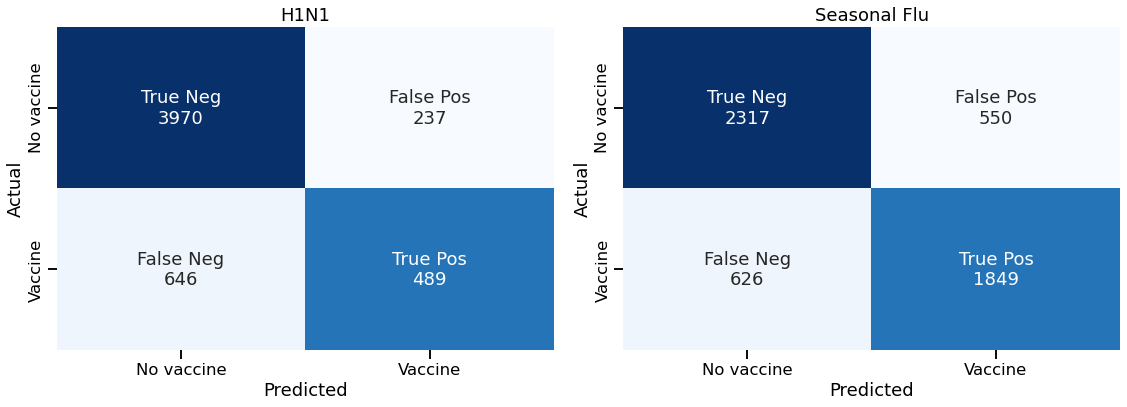

In [62]:
all_metrics([y_test_h1n1, y_test_ssnl], [y_hat_h1n1, y_hat_ssnl], [y_proba_h1n1, y_proba_ssnl], model_name=['H1N1','Seasonal Flu'])

### Submitting this score to the competition, to guage our low-performing models

In [63]:
submission_df = pd.read_csv('data/submission_format.csv', 
                            index_col="respondent_id")

In [69]:
np.testing.assert_array_equal(X_test_comp.index.values, 
                              submission_df.index.values)

In [71]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imputer.fit(X_train)

X_test_imp_comp = pd.DataFrame(imputer.transform(X_test_comp), columns=X_test_comp.columns, index=X_test_comp.index)

In [73]:
X_test_obj_comp = X_test_imp_comp

ohe = OneHotEncoder(categories="auto", handle_unknown="ignore", sparse=False)

X_test_ohe_comp = pd.DataFrame(ohe.fit_transform(X_test_obj_comp), columns=ohe.get_feature_names(), index=X_test_obj_comp.index)

X_test_ohe_comp = pd.concat([X_test_imp_comp[numeric_columns], X_test_ohe_comp], axis=1)

In [75]:
y_proba_h1n1_comp = log_reg_h1n1.predict_proba(X_test_ohe_comp)
y_proba_ssnl_comp = log_reg_ssnl.predict_proba(X_test_ohe_comp)

In [76]:
submission_df["h1n1_vaccine"] = y_proba_h1n1_comp[:, 1]
submission_df["seasonal_vaccine"] = y_proba_ssnl_comp[:, 1]

submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.063167,0.318644
26708,0.037067,0.031498
26709,0.396263,0.732449
26710,0.447803,0.846152
26711,0.206356,0.337308


In [77]:
submission_df.to_csv('data/my_submission.csv', index=True)

In [79]:
!head data/my_submission.csv

respondent_id,h1n1_vaccine,seasonal_vaccine
26707,0.06316673777509094,0.318644409195383
26708,0.0370669600357851,0.031498393319783935
26709,0.3962627864645949,0.7324491781802666
26710,0.44780272545585964,0.8461520789716166
26711,0.20635633316102836,0.33730823058077625
26712,0.4879251639827327,0.9455146388294033
26713,0.40716808436658614,0.5698070576015274
26714,0.10365816878055854,0.18773172753498987
26715,0.05173101047121089,0.16419234936578309


# First models after getting pipeline working

### Untuned Logistic Regression

In [383]:
linear_preprocessor.fit(X_train, y_train_h1n1)
y_hat_h1n1 = linear_preprocessor.predict(X_test)
y_proba_h1n1 = linear_preprocessor.predict_proba(X_test)
y_proba_h1n1_comp = linear_preprocessor.predict_proba(X_test_comp)

linear_preprocessor.fit(X_train, y_train_ssnl)
y_hat_ssnl = linear_preprocessor.predict(X_test)
y_proba_ssnl = linear_preprocessor.predict_proba(X_test)
y_proba_ssnl_comp = linear_preprocessor.predict_proba(X_test_comp)

Recall for H1N1:    0.5004405286343613
Recall for Seasonal Flu:    0.7442424242424243

Precision for H1N1: 0.7244897959183674
Precision for Seasonal Flu: 0.76814011676397

Accuracy for H1N1:  0.8534256832646949
Accuracy for Seasonal Flu:  0.7774241856982403

F1 score for H1N1:  0.5919749869723814
F1 score for Seasonal Flu:  0.7560024625487379

AUROC for H1N1:     0.8691042514625823
AUROC for Seasonal Flu:     0.8564199370756748


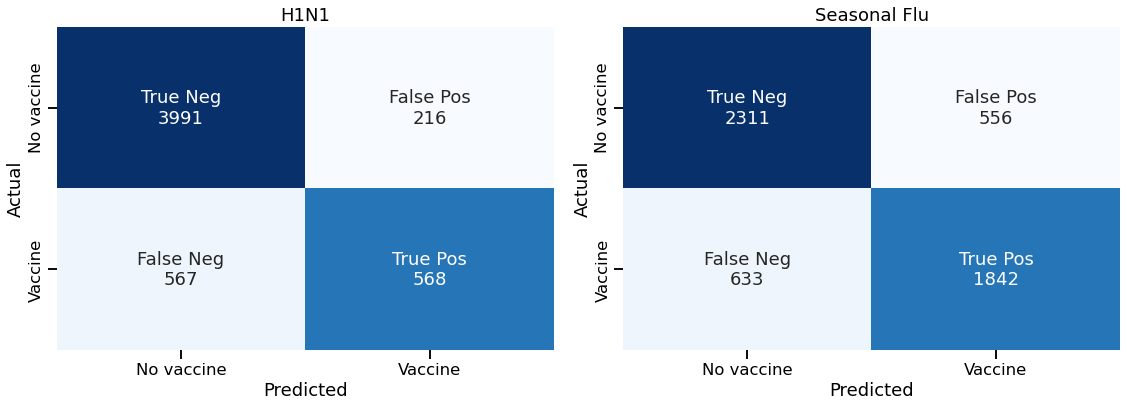

In [384]:
all_metrics([y_test_h1n1, y_test_ssnl], [y_hat_h1n1, y_hat_ssnl], [y_proba_h1n1, y_proba_ssnl], ['H1N1', 'Seasonal Flu'])

In [258]:
(0.8691092776984864+0.8564203598594949) / 2

0.8627648187789907

In [252]:
submission_df = pd.read_csv('data/submission_format.csv', 
                            index_col="respondent_id")

In [253]:
np.testing.assert_array_equal(X_test_comp.index.values, 
                              submission_df.index.values)

In [254]:
submission_df["h1n1_vaccine"] = y_proba_h1n1_comp[:, 1]
submission_df["seasonal_vaccine"] = y_proba_ssnl_comp[:, 1]

submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.113173,0.375069
26708,0.025997,0.028402
26709,0.244246,0.695510
26710,0.500280,0.859745
26711,0.322239,0.403610


In [255]:
submission_df.to_csv('data/my_submission.csv', index=True)

In [256]:
!head data/my_submission.csv

respondent_id,h1n1_vaccine,seasonal_vaccine
26707,0.11317282884027721,0.37506939114042215
26708,0.02599737885236411,0.028402248436015777
26709,0.2442462051065385,0.6955101258538736
26710,0.5002803932105893,0.859745437477238
26711,0.3222389143238363,0.4036097227087465
26712,0.6852679617965983,0.9589032310334851
26713,0.19983915048877718,0.4959990653500269
26714,0.17226834641640074,0.2301630679050126
26715,0.01923289882731021,0.13394514386092657


### Randomly Tuned Random Forest

In [381]:
tree_preprocessor.fit(X_train, y_train_h1n1)
y_hat_h1n1 = tree_preprocessor.predict(X_test)
y_proba_h1n1 = tree_preprocessor.predict_proba(X_test)
y_proba_h1n1_comp = tree_preprocessor.predict_proba(X_test_comp)

tree_preprocessor.fit(X_train, y_train_ssnl)
y_hat_ssnl = tree_preprocessor.predict(X_test)
y_proba_ssnl = tree_preprocessor.predict_proba(X_test)
y_proba_ssnl_comp = tree_preprocessor.predict_proba(X_test_comp)

Recall for H1N1:    0.39118942731277534
Recall for Seasonal Flu:    0.7442424242424243

Precision for H1N1: 0.7775831873905429
Precision for Seasonal Flu: 0.7691022964509394

Accuracy for H1N1:  0.8468738300262074
Accuracy for Seasonal Flu:  0.7779857731186821

F1 score for H1N1:  0.5205158264947245
F1 score for Seasonal Flu:  0.7564681724845996

AUROC for H1N1:     0.8673921898576842
AUROC for Seasonal Flu:     0.8528471319402605


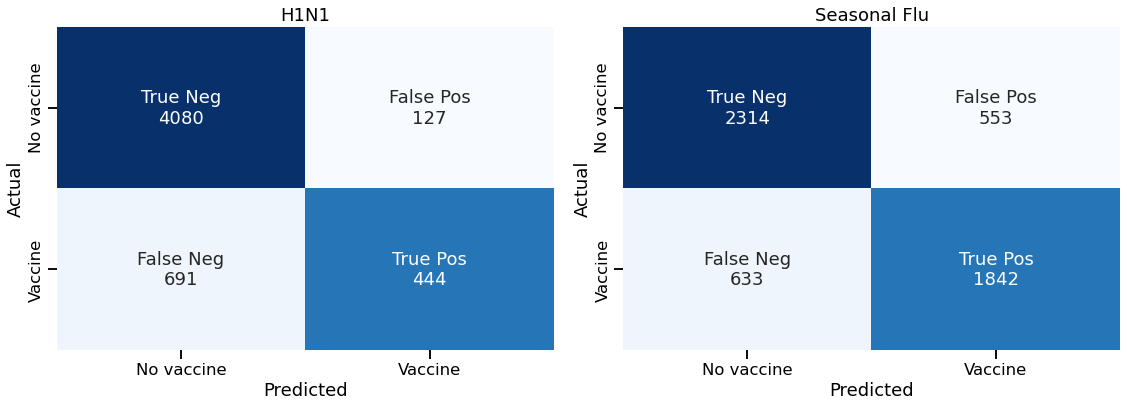

In [382]:
all_metrics([y_test_h1n1, y_test_ssnl], [y_hat_h1n1, y_hat_ssnl], [y_proba_h1n1, y_proba_ssnl], ['H1N1', 'Seasonal Flu'])